# 準備

次のセルを実行する。数分～十数分の時間がかかる。

* Deep Learningライブラリのインストール
* 学習済み重みファイル、設定ファイルのダウンロード
* 学習済みモデルの読み込み

等が行われる。

In [0]:
# mmdetectionのインストール
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -v -e .

# deep learning重みファイルのダウンロード
!curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=149DCYqaehEC5ZCDB5rCNvC3vsqew1cmL" > /dev/null;CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)" ;curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=149DCYqaehEC5ZCDB5rCNvC3vsqew1cmL" -o weight.pth

# deep learning設定ファイルのダウンロード
!wget https://raw.githubusercontent.com/kondou-shouichi-hro/kondou-shouichi-hro.github.io/master/shika_hiru_reppoints_moment_x101_dcn_fpn_2x_mt.py

# 解析画像保存用フォルダ
%cd ..
!mkdir images

# ライブラリのimport
from mmdet.apis import init_detector, inference_detector, show_result
from pathlib import Path
from tqdm import tqdm

# モデルのロード
model = init_detector('./mmdetection/shika_hiru_reppoints_moment_x101_dcn_fpn_2x_mt.py', './mmdetection/weight.pth')

# 解析画像のアップロード

- 以下の画像のように、左側のペインの「images」フォルダを右クリックし「アップロード」をクリック。
- ファイル選択ダイアログが出るので、解析したい画像を選択する（複数選択可）。

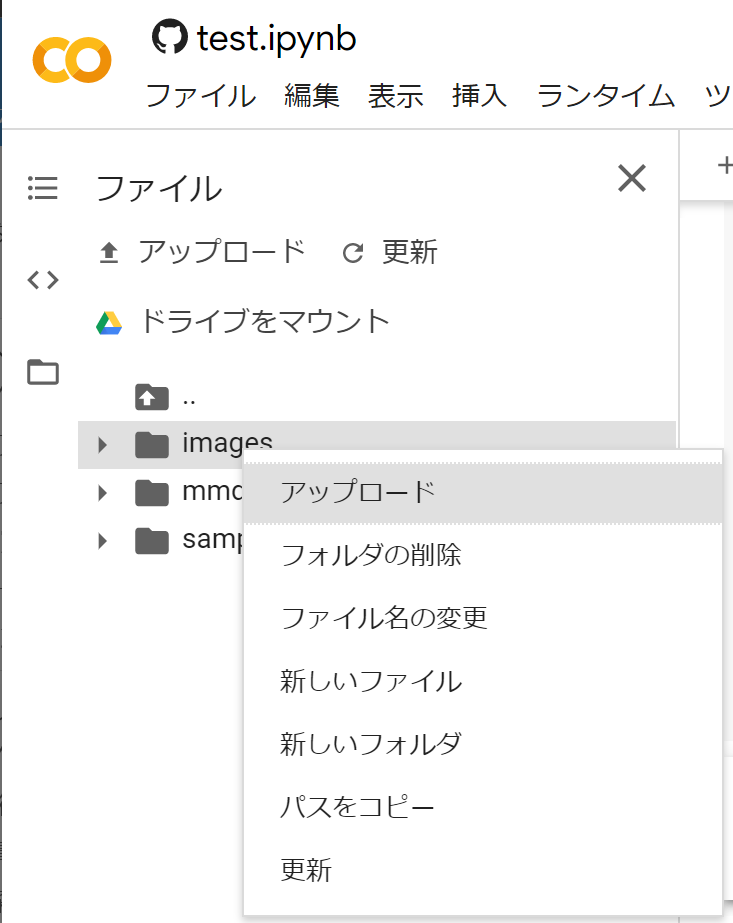

# シカ検出プログラムの実行

次のセルを実行する。1秒間に数枚くらいの速度。

In [0]:
input_dir = './images'
output_dir = './output'
score_thr = 0.5
from itertools import chain
types = ['jpg', 'png', 'JPG']

for name in tqdm(chain(*[Path(input_dir).glob(f'*.{ext}') for ext in types])):
  result = inference_detector(model, str(name))
  show_result(str(name), result, ('shika', 'a'), out_file=f'{output_dir}/{name.stem}.jpg', show=False, score_thr=score_thr)


# 結果のダウンロード

以下のセルを実行するとzipファイルに圧縮されてダウンロードできる。

In [0]:
!zip output -r output
from google.colab import files
files.download('output.zip')